In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계
- 다중 분류 딥러닝 모델링을 연습해보기

In [ ]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 데이터 로딩



In [ ]:
# keras에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [ ]:
# 문제 데이터와 정답 데이터가 나뉘어 제공해주고 있음
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 훈련 데이터 6만장, 테스트 데이터 1만장
# 사진 데이터라 28*28 3차원의 데이터
# 28*28 픽셀 -> 픽셀은 사진의 정보를 가지고 있는 단위(작은 사각형 하나가 1픽셀)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


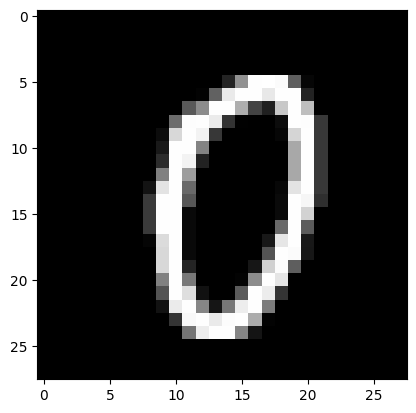

In [ ]:
# 사진 데이터 확인
plt.imshow(X_train[1000], cmap='gray')

# 흑백사진
# 0~255 검정색의 정도를 숫자로 사진다

In [ ]:
# 정답 데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- loss, optimizer 설정

In [ ]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten

# Dense : 퍼셉트론을 묶음으로 표현하는 클래스
# InputLater : 입력층 설정
# Flatten : 2차원의 사진 데이터를 1차원으로 표현하기 위한 클래스

In [ ]:
# 1. 신경망 설계
# 뼈대
digit_model = Sequential()

# 입력층
digit_model.add(InputLayer (input_shape = (28,28))) # 28*28의 2차원 데이터

# 중간층
digit_model.add(Flatten()) # 2차원의 사진 데이터를 1차원으로 변경 (선형모델을 위한 작업)
digit_model.add(Dense(units = 16, activation = 'relu'))
digit_model.add(Dense(units = 8, activation = 'relu'))
digit_model.add(Dense(units = 32, activation = 'relu'))
digit_model.add(Dense(units = 16, activation = 'relu'))
digit_model.add(Dense(units = 8, activation = 'relu'))

# 출력층 (분류모델은 확률값으로 출력받기를 원함) -> 다중분류에서는 확률값이 몇 개가 필요할까? -> 클래스의 개수만큼 선형모델(확률값) 필요
digit_model.add(Dense(units = 10, activation='softmax'))
# 활성화 함수 : softmax(클래스의 개수만큼 확률값이 출력 -> 총합 1로 만들어주는 함수)

[정리]
# 출력층에서 사용하는 unit 의 개수와 활성화 함수
- 회귀: units = 1, activation = 'linear' (default)
- 이진분류: units = 1, activation = 'sigmoid'
- 다중분류: units = 클래스의 개수, activation = 'softmax'

In [ ]:
# 2. 모델 학습 및 평가 방법 설정
digit_model.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])
# loss : 오차 - 실제값과 예측값의 차이
# 회귀 : mean_squared_error
# 이진분류 : binary_crossentropy
# 다중분류 : categorical_crossentropy

In [ ]:
# 정답 데이터의 형태 확인
y_train
# 실제 결과값 (클래스 중 하나를 출력 -> 범주형)
# 모델링 결과 : 10개의 클래스에 대한 각각의 확률값
# 1개와 10개는 비교가 불가능

# 2가지 해결방법
# [방법1. 정답 데이터를 확률호 변경]
# [방법2. loss함수를 변경]
# keras에서 지원하는 자동으로 정답 데이터를 알아서 확률로 계산해주는 방법


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# [방법1. 정답 데이터를 확률값으로 변경하기]
# 모델의 예측값은 확률값으로 출력이 되지만, 정답 데이터는 범주형 데이터로 서로 비교(loss값을 찾는 비교)가 불가능
# 직접 정답 데이터를 범주형에서 확률값으로 변경해주자
from tensorflow.keras.utils import to_categorical
# 범주형 데이터를 확률값으로 변경
one_hot_y_train = to_categorical(y_train)
one_hot_y_train[0:2]
# 첫번째 데이터는 5일 확률이 100%
# 두번째 데이터는 0일 확률이 100%

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# [방법2. loss 함수를 'sparse_categorical_crossentropy'라고 변경]
# 평가를 할 때 알아서 확률값으로 변경해서 계산
# 스스로 내부에서 범주값을 확률값으로 변경하는 작업을 수행 후 loss값을 계산
digit_model.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])

# 2번 방법 선호!

In [ ]:
# 3. 모델 학습 및 시각화
h1 = digit_model.fit(X_train, y_train,
                    validation_split=0.2, # 교차검증
                    epochs = 20)

# 문제 발생
# 오류 확인 - 정답 데이터의 shape가 일치하지 않음 (shape가 다르면 비교할 수 없음) :  ValueError: Shapes (32, 1) and (32, 10) are incompatible
# y_train


Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 1.9223 - accuracy: 0.2718 - val_loss: 1.7496 - val_accuracy: 0.2995
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4644 - accuracy: 0.4509 - val_loss: 1.2734 - val_accuracy: 0.5400
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0809 - accuracy: 0.5955 - val_loss: 0.9442 - val_accuracy: 0.6403
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8620 - accuracy: 0.7219 - val_loss: 0.8044 - val_accuracy: 0.7387
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7417 - accuracy: 0.7745 - val_loss: 0.7006 - val_accuracy: 0.7848
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6626 - accuracy: 0.8023 - val_loss: 0.6216 - val_accuracy: 0.8149
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6001 - accuracy: 0.8309 - val_loss: 0.5403 - val_accuracy:

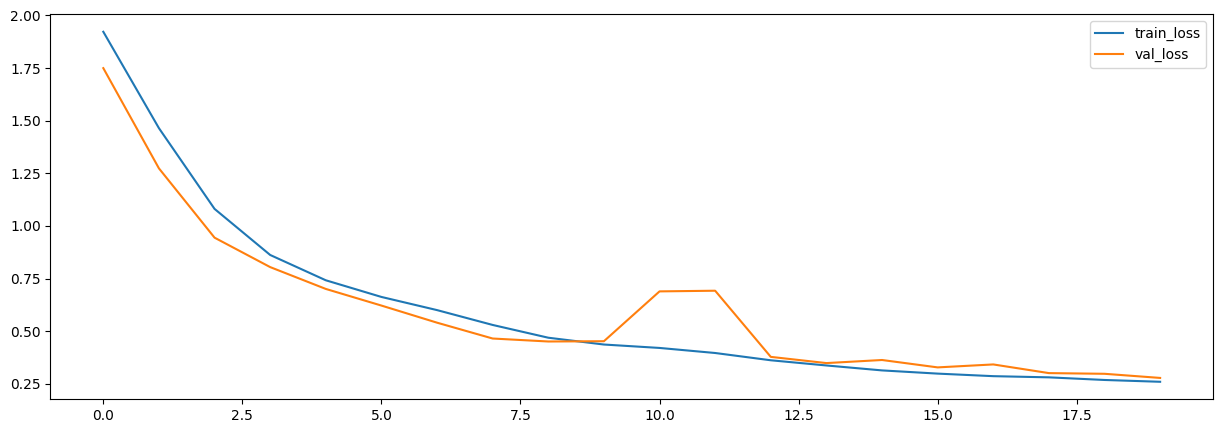

In [ ]:
# 학습결과 시각화

# loss
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'], label='train_loss')
# val_loss
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 4. 모델 예측 및 평가
digit_model.evaluate(X_test,y_test)

# 정확도 0.847

313/313 [==============================] - 1s 3ms/step - loss: 0.2883 - accuracy: 0.9255


[0.28833046555519104, 0.9254999756813049]

### 직접 작성한 손글씨 숫자 test 해보기

In [ ]:
# 파있너에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg

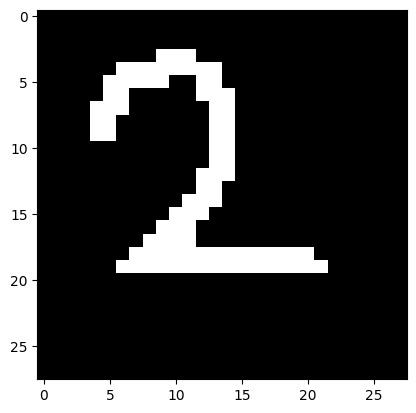

In [ ]:
img = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/2.png').convert('L')
plt.imshow(img,cmap='gray')

In [ ]:
# 전처리
# 이미지 타입을 배열로 변환
img = np.array(img)
img.shape

(28, 28)

In [ ]:
# 2차원 -> 1차원
test_img = img.reshape(1,28,28,1)
test_img.astype('float32')/255
test_img.shape

(1, 28, 28, 1)

In [ ]:
# 예측
digit_model.predict(test_img)

# 결과 : 10개의 확률로 출력


1/1 [==============================] - 0s 214ms/step


array([[5.2733818e-04, 5.0734438e-02, 5.8352602e-01, 1.4258102e-01,
        1.7958831e-02, 8.2112635e-03, 1.5077611e-02, 2.7485290e-03,
        1.3087156e-01, 4.7763437e-02]], dtype=float32)

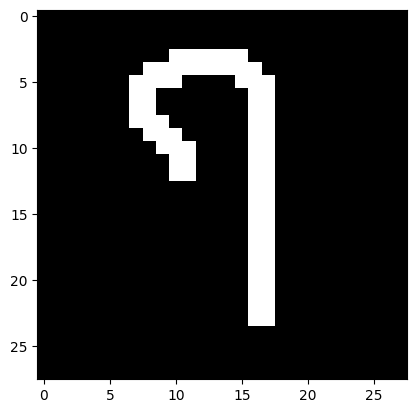

In [ ]:
img2 = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/7_1.png').convert('L')
plt.imshow(img2, cmap='gray')

In [ ]:
img2 = np.array(img2)
img2.shape

(28, 28)

In [ ]:
test_img2 = img2.reshape(1,28,28,1)
test_img2.astype('float32')/255
test_img2.shape

(1, 28, 28, 1)

In [ ]:
digit_model.predict(test_img2)

1/1 [==============================] - 0s 23ms/step


array([[0.12749271, 0.00187381, 0.00456748, 0.00559505, 0.04293038,
        0.6856216 , 0.00610722, 0.03431495, 0.07952096, 0.01197592]],
      dtype=float32)